# Visualization

In [1]:
import pandas as pd

In [2]:
import pickle
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

In [3]:
## Which avocado size is most popular?
with open('avoplotto.pkl', 'rb') as f:
    avocados = pickle.load(f)

In [4]:
avocados['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [5]:
# Look at the first few rows of data
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


In [6]:
# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()

In [7]:
nb_sold_by_size

size
extra_large    1.561752e+08
large          2.015012e+09
small          2.054936e+09
Name: nb_sold, dtype: float64

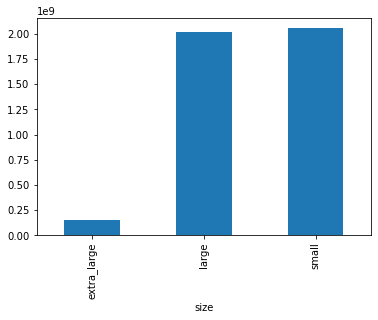

In [8]:
# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind='bar')

# Show the plot
plt.show()

In [9]:
## Changes in sales over time

# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()


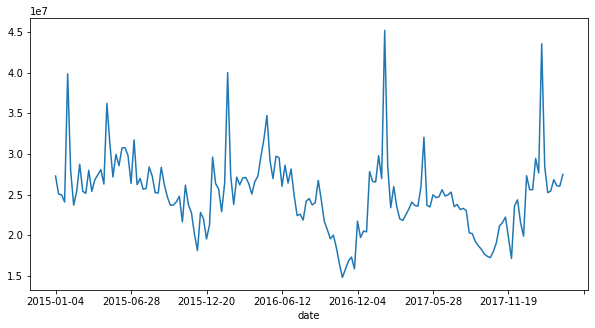

In [10]:
# Create a line plot of the number of avocados sold by date
plt.figure(figsize=(10,5))
nb_sold_by_date.plot(x='date')
# Show the plot


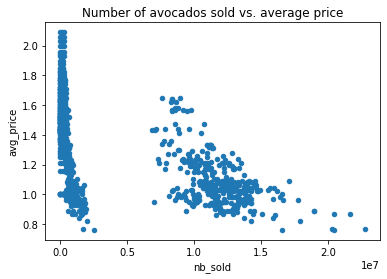

In [11]:
# Scatter plot of nb_sold vs avg_price with title
avocados.plot(x='nb_sold', y='avg_price', kind='scatter', title="Number of avocados sold vs. average price")

# Show the plot
plt.show()

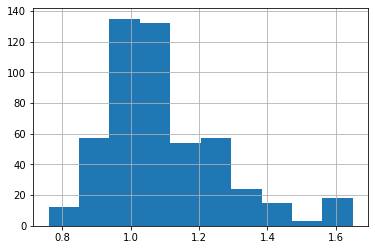

In [12]:
# Histogram of conventional avg_price 
avocados[avocados["type"] == "conventional"]["avg_price"].hist()

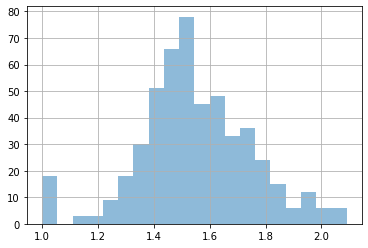

In [13]:
# Histogram of organic avg_price
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)

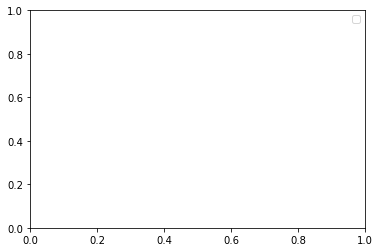

In [70]:
# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

#### reading dataframes


In [15]:
import pandas as pd

In [16]:
# Create a list of dictionaries with new data
avocados_list = [
    {'date': "2019-11-03", 'small_sold': 10376832, 'large_sold':7835071},
    {'date': "2019-11-10", 'small_sold': 10717154, 'large_sold':8561348},
]

In [17]:
# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


In [18]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ['2019-11-17','2019-12-01'],
  "small_sold": [10859987, 9291631],
  "large_sold": [7674135, 6238096]
}

In [20]:
# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096


# Mearging DataFrames

## Preparing Data

In [23]:
import pandas as pd

# Read 'Bronze.csv' into a DataFrame: bronze
bronze = pd.read_csv('Bronze.csv')
# Read 'Silver.csv' into a DataFrame: silver
silver = pd.read_csv('Silver.csv')
# Read 'Gold.csv' into a DataFrame: gold
gold = pd.read_csv('Gold.csv')

In [24]:
# Print the first five rows of gold
print(gold.head())

   NOC         Country   Total
0  USA   United States  2088.0
1  URS    Soviet Union   838.0
2  GBR  United Kingdom   498.0
3  FRA          France   378.0
4  GER         Germany   407.0


In [25]:
# Create the list of file names: filenames
filenames = ['Gold.csv', 'Silver.csv', 'Bronze.csv']

In [26]:
# Create the list of three DataFrames: dataframes (one line of code)
dataframes = [pd.read_csv(filename) for filename in filenames]

In [28]:
# Print top 5 rows of 1st DataFrame in dataframes
print(dataframes[0].head())

   NOC         Country   Total
0  USA   United States  2088.0
1  URS    Soviet Union   838.0
2  GBR  United Kingdom   498.0
3  FRA          France   378.0
4  GER         Germany   407.0


In [29]:
# Make a copy of gold: medals
medals = gold.copy()

In [30]:
# Create list of new column labels: new_labels
new_labels = ['NOC', 'Country', 'Gold']

In [31]:
# Rename the columns of medals using new_labels
medals.columns = new_labels

In [32]:
# Add columns 'Silver' & 'Bronze' to medals
medals['Silver'] = silver['Total']
medals['Bronze'] = bronze['Total']

# Print the head of medals
print(medals.head())

   NOC         Country    Gold  Silver  Bronze
0  USA   United States  2088.0  1195.0  1052.0
1  URS    Soviet Union   838.0   627.0   584.0
2  GBR  United Kingdom   498.0   591.0   505.0
3  FRA          France   378.0   461.0   475.0
4  GER         Germany   407.0   350.0   454.0


In [71]:
# Read 'monthly_max_temp.csv' into a DataFrame: weather1
import pandas as pd

X = pd.read_csv('monthly_max_temp.csv')
print(X)
weather1 = pd.read_csv('monthly_max_temp.csv', index_col = 'Month')

# Print the head of weather1
print(weather1.head())

   Month  Max TemperatureF
0    Jan                68
1    Feb                60
2    Mar                68
3    Apr                84
4    May                88
5    Jun                89
6    Jul                91
7    Aug                86
8    Sep                90
9    Oct                84
10   Nov                72
11   Dec                68
       Max TemperatureF
Month                  
Jan                  68
Feb                  60
Mar                  68
Apr                  84
May                  88


In [39]:
weather1.head()

,Max TemperatureF
Month,
Jan,68
Feb,60
Mar,68
Apr,84
May,88


In [72]:
weather1['date'] = weather1.to_datetime()

AttributeError: 'DataFrame' object has no attribute 'to_datetime'

In [41]:
# Sort the index of weather1 in alphabetical order: weather2
weather2 = weather1.sort_index()

# Print the head of weather2
print(weather2.head())

       Max TemperatureF
Month                  
Apr                  84
Aug                  86
Dec                  68
Feb                  60
Jan                  68


In [42]:
# Sort the index of weather1 in reverse alphabetical order: weather3
weather3 = weather1.sort_index(ascending=False)

# Print the head of weather3
print(weather3.head())

       Max TemperatureF
Month                  
Sep                  90
Oct                  84
Nov                  72
May                  88
Mar                  68


In [43]:
# Sort weather1 numerically using the values of 'Max TemperatureF': weather4
weather4 = weather1.sort_values('Max TemperatureF')

# Print the head of weather4
print(weather4.head())

       Max TemperatureF
Month                  
Feb                  60
Jan                  68
Mar                  68
Dec                  68
Nov                  72


In [44]:
## Baby's name DataFrame

In [46]:
## import data from names1981.csv without header, column names = 'name', gender, count, make the first two columns indices
names_1981 = pd.read_csv('names1981.csv', header=None, names=['name','gender','count'], index_col=(0,1))

In [48]:
## import data from names1881.csv without header, column names = 'name', gender, count, make the first two columns indices
names_1881 = pd.read_csv('names1881.csv', header=None, names=['name','gender','count'], index_col=(0,1))

In [49]:
names_1981.head()

,,count
name,gender,
Jennifer,F,57032
Jessica,F,42519
Amanda,F,34370
Sarah,F,28162
Melissa,F,28003


In [50]:
names_1881.shape

(1935, 1)

In [81]:
# Reindex names_1981 with index of names_1881: common_names
print(names_1881.head(),names_1881.shape)
print('-'*35)

print(names_1981.head(),names_1981.shape)
print('-'*35)

common_names = names_1981.reindex(names_1881.index)
print(names_1881.index)
print(common_names)
# Print shape of common_names
print(common_names.shape)

                  count
name      gender       
Mary      F        6919
Anna      F        2698
Emma      F        2034
Elizabeth F        1852
Margaret  F        1658 (1935, 1)
-----------------------------------
                 count
name     gender       
Jennifer F       57032
Jessica  F       42519
Amanda   F       34370
Sarah    F       28162
Melissa  F       28003 (19455, 1)
-----------------------------------
MultiIndex([(     'Mary', 'F'),
            (     'Anna', 'F'),
            (     'Emma', 'F'),
            ('Elizabeth', 'F'),
            ( 'Margaret', 'F'),
            (   'Minnie', 'F'),
            (      'Ida', 'F'),
            (    'Annie', 'F'),
            (   'Bertha', 'F'),
            (    'Alice', 'F'),
            ...
            (   'Verner', 'M'),
            (  'Waverly', 'M'),
            (  'Webster', 'M'),
            (   'Weldon', 'M'),
            (    'Wells', 'M'),
            (   'Wiliam', 'M'),
            (   'Wilton', 'M'),
            (     

In [52]:
# Drop rows with null counts: common_names
common_names = common_names.dropna()

# Print shape of new common_names
print(common_names.shape)

(1587, 1)


In [53]:
names_1881.index


MultiIndex([(     'Mary', 'F'),
            (     'Anna', 'F'),
            (     'Emma', 'F'),
            ('Elizabeth', 'F'),
            ( 'Margaret', 'F'),
            (   'Minnie', 'F'),
            (      'Ida', 'F'),
            (    'Annie', 'F'),
            (   'Bertha', 'F'),
            (    'Alice', 'F'),
            ...
            (   'Verner', 'M'),
            (  'Waverly', 'M'),
            (  'Webster', 'M'),
            (   'Weldon', 'M'),
            (    'Wells', 'M'),
            (   'Wiliam', 'M'),
            (   'Wilton', 'M'),
            (     'Wing', 'M'),
            (     'Wood', 'M'),
            (   'Wright', 'M')],
           names=['name', 'gender'], length=1935)

In [54]:
## Pittsburg westher DataFrame

In [56]:
weather = pd.read_csv('pittsburgh2013.csv',index_col='Date', parse_dates=True)
## Precipitation from 2013-7-1 to 2013-7-7
weather.loc['2013-7-1':'2013-7-7', 'PrecipitationIn']

Date
2013-07-01    0.18
2013-07-02    0.14
2013-07-03    0.00
2013-07-04    0.25
2013-07-05    0.02
2013-07-06    0.06
2013-07-07    0.10
Name: PrecipitationIn, dtype: float64

In [57]:
## Convert inches to centimeters
weather.loc['2013-07-01':'2013-07-07', 'PrecipitationIn'] * 2.54

Date
2013-07-01    0.4572
2013-07-02    0.3556
2013-07-03    0.0000
2013-07-04    0.6350
2013-07-05    0.0508
2013-07-06    0.1524
2013-07-07    0.2540
Name: PrecipitationIn, dtype: float64

In [58]:
## absolute temperature range from Min TemperatureF, Max TemperatureF from 2013-7-1 to 2013-7-7
week1_range = weather.loc['2013-07-01':'2013-07-07',['Min TemperatureF', 'Max TemperatureF']]
print(week1_range)

            Min TemperatureF  Max TemperatureF
Date                                          
2013-07-01                66                79
2013-07-02                66                84
2013-07-03                71                86
2013-07-04                70                86
2013-07-05                69                86
2013-07-06                70                89
2013-07-07                70                77


In [59]:
## average temperature
week1_mean = weather.loc['2013-07-01':'2013-07-07','Mean TemperatureF']
print(week1_mean)

Date
2013-07-01    72
2013-07-02    74
2013-07-03    78
2013-07-04    77
2013-07-05    76
2013-07-06    78
2013-07-07    72
Name: Mean TemperatureF, dtype: int64


In [60]:
## relative temperature range
week1_range / week1_mean

,2013-07-01 00:00:00,2013-07-02 00:00:00,2013-07-03 00:00:00,2013-07-04 00:00:00,2013-07-05 00:00:00,2013-07-06 00:00:00,2013-07-07 00:00:00,Max TemperatureF,Min TemperatureF
Date,,,,,,,,,
2013-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
## relative temperature range
week1_range.divide(week1_mean, axis='rows')

,Min TemperatureF,Max TemperatureF
Date,,
2013-07-01,0.916667,1.097222
2013-07-02,0.891892,1.135135
2013-07-03,0.910256,1.102564
2013-07-04,0.909091,1.116883
2013-07-05,0.907895,1.131579
2013-07-06,0.897436,1.141026
2013-07-07,0.972222,1.069444


In [62]:
## percent change
week1_mean.pct_change() * 100

Date
2013-07-01         NaN
2013-07-02    2.777778
2013-07-03    5.405405
2013-07-04   -1.282051
2013-07-05   -1.298701
2013-07-06    2.631579
2013-07-07   -7.692308
Name: Mean TemperatureF, dtype: float64

In [63]:
bronze = pd.read_csv('bronze_top5.csv', index_col=0)
print(bronze)
silver = pd.read_csv('silver_top5.csv', index_col=0)
print(silver)
gold = pd.read_csv('gold_top5.csv', index_col=0)
print(gold)

                 Total
Country               
United States   1052.0
Soviet Union     584.0
United Kingdom   505.0
France           475.0
Germany          454.0
                 Total
Country               
United States   1195.0
Soviet Union     627.0
United Kingdom   591.0
France           461.0
Italy            394.0
                 Total
Country               
United States   2088.0
Soviet Union     838.0
United Kingdom   498.0
Italy            460.0
Germany          407.0


In [64]:
## add bronze and silver using '+' operator
bronze + silver

,Total
Country,
France,936.0
Germany,NaN
Italy,NaN
Soviet Union,1211.0
United Kingdom,1096.0
United States,2247.0


In [66]:
## add bronze and silver using .add function
bronze.add(silver)

,Total
Country,
France,936.0
Germany,NaN
Italy,NaN
Soviet Union,1211.0
United Kingdom,1096.0
United States,2247.0


In [67]:
## add bronze and silver using .add function and fill NA values with 0
bronze.add(silver, fill_value=0)

,Total
Country,
France,936.0
Germany,454.0
Italy,394.0
Soviet Union,1211.0
United Kingdom,1096.0
United States,2247.0


In [68]:
## add bronze, silver, and gold using '+' operator
bronze + silver + gold

,Total
Country,
France,NaN
Germany,NaN
Italy,NaN
Soviet Union,2049.0
United Kingdom,1594.0
United States,4335.0


In [69]:
## add bronze, silver, and gold using .add function, then fill NA values with 0
bronze.add(silver, fill_value=0).add(gold, fill_value=0)

,Total
Country,
France,936.0
Germany,861.0
Italy,854.0
Soviet Union,2049.0
United Kingdom,1594.0
United States,4335.0


In [33]:
## GDP

In [34]:
# Read 'gdp_usa.csv' into a DataFrame: gdp (units: million dollars), use DATE as index
gdp = pd.read_csv('gdp_usa.csv', index_col='DATE', parse_dates=True)

In [39]:
gdp.head()

,VALUE
DATE,
1947-01-01,243.1
1947-04-01,246.3
1947-07-01,250.1
1947-10-01,260.3
1948-01-01,266.2


In [41]:
# Slice all the gdp data from 2008 onward: post2008
post2008 = gdp['2008':]

In [42]:
# Print the last 8 rows of post2008
print(post2008.tail(8))

              VALUE
DATE               
2014-07-01  17569.4
2014-10-01  17692.2
2015-01-01  17783.6
2015-04-01  17998.3
2015-07-01  18141.9
2015-10-01  18222.8
2016-01-01  18281.6
2016-04-01  18436.5


In [43]:
# Resample post2008 by year, keeping last(): yearly
yearly = post2008.resample('A').last()

In [44]:
# Print yearly
print(yearly)

              VALUE
DATE               
2008-12-31  14549.9
2009-12-31  14566.5
2010-12-31  15230.2
2011-12-31  15785.3
2012-12-31  16297.3
2013-12-31  16999.9
2014-12-31  17692.2
2015-12-31  18222.8
2016-12-31  18436.5


In [45]:
# Compute percentage growth of yearly: yearly['growth']
yearly['growth'] = yearly.pct_change() *  100

In [46]:
# Print yearly again
print(yearly)

              VALUE    growth
DATE                         
2008-12-31  14549.9       NaN
2009-12-31  14566.5  0.114090
2010-12-31  15230.2  4.556345
2011-12-31  15785.3  3.644732
2012-12-31  16297.3  3.243524
2013-12-31  16999.9  4.311144
2014-12-31  17692.2  4.072377
2015-12-31  18222.8  2.999062
2016-12-31  18436.5  1.172707


In [52]:
# Read 'sp500.csv' into a DataFrame: sp500,  use Date as index
sp500 = pd.read_csv('sp500.csv', index_col='Date', parse_dates=True)

In [55]:
sp500.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2708700000,2058.199951
2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,3799120000,2020.579956
2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,4460110000,2002.609985
2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,3805480000,2025.900024
2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,3934010000,2062.139893


In [56]:
# Read 'exchange.csv' into a DataFrame: exchange, use Date as index
exchange = pd.read_csv('exchange.csv', index_col='Date', parse_dates=True )

In [49]:
# Subset 'Open' & 'Close' columns from sp500: dollars
dollars = sp500[['Open','Close']]

In [50]:
# Print the head of dollars
print(dollars.head())

                   Open        Close
Date                                
2015-01-02  2058.899902  2058.199951
2015-01-05  2054.439941  2020.579956
2015-01-06  2022.150024  2002.609985
2015-01-07  2005.550049  2025.900024
2015-01-08  2030.609985  2062.139893


In [ ]:
# Convert dollars to pounds: pounds, using 'GBP/USD'
pounds = dollars.multiply(exchange['GBP/USD'],axis='rows')

In [ ]:
# Print the head of pounds
print(pounds.head())

## Concatenating data

In [4]:
# Load 'sales-jan-2015.csv' into a DataFrame: jan
jan = pd.read_csv('sales-jan-2015.csv', index_col='Date', parse_dates=True)

# Load 'sales-feb-2015.csv' into a DataFrame: feb
feb = pd.read_csv('sales-feb-2015.csv', index_col='Date', parse_dates=True)

# Load 'sales-mar-2015.csv' into a DataFrame: mar
mar = pd.read_csv('sales-mar-2015.csv', index_col='Date', parse_dates=True)

In [5]:
jan.head()

,Company,Product,Units
Date,,,
2015-01-21 19:13:21,Streeplex,Hardware,11
2015-01-09 05:23:51,Streeplex,Service,8
2015-01-06 17:19:34,Initech,Hardware,17
2015-01-02 09:51:06,Hooli,Hardware,16
2015-01-11 14:51:02,Hooli,Hardware,11


In [6]:
# Extract the 'Units' column from jan: jan_units
jan_units = jan['Units']

# Extract the 'Units' column from feb: feb_units
feb_units = feb['Units']

# Extract the 'Units' column from mar: mar_units
mar_units = mar['Units']

In [7]:
# Append feb_units and then mar_units to jan_units: quarter1
quarter1 = jan_units.append(feb_units).append(mar_units)

# Print the first slice from quarter1
print(quarter1.loc['jan 27, 2015':'feb 2, 2015'])

# Print the second slice from quarter1
print(quarter1.loc['feb 26, 2015':'mar 7, 2015'])

# Compute & print total sales in quarter1
print(quarter1.sum())

Date
2015-01-27 07:11:55    18
2015-02-02 08:33:01     3
2015-02-02 20:54:49     9
Name: Units, dtype: int64
Date
2015-02-26 08:57:45     4
2015-02-26 08:58:51     1
2015-03-06 10:11:45    17
2015-03-06 02:03:56    17
Name: Units, dtype: int64
642


In [8]:
# Initialize empty list: units
units = []

# Build the list of Series
for month in [jan, feb, mar]:
    units.append(month['Units'])


In [9]:
# Concatenate the list: quarter1
import numpy as np
import pandas as pd
quarter1 = pd.concat(units)

In [64]:
## Can do the same thing
units2=pd.concat([jan['Units'], feb['Units'], mar['Units']])

In [65]:
units

[Date
 2015-01-21 19:13:21    11
 2015-01-09 05:23:51     8
 2015-01-06 17:19:34    17
 2015-01-02 09:51:06    16
 2015-01-11 14:51:02    11
 2015-01-01 07:31:20    18
 2015-01-24 08:01:16     1
 2015-01-25 15:40:07     6
 2015-01-13 05:36:12     7
 2015-01-03 18:00:19    19
 2015-01-16 00:33:47    17
 2015-01-16 07:21:12    13
 2015-01-20 19:49:24    12
 2015-01-26 01:50:25    14
 2015-01-15 02:38:25    16
 2015-01-06 13:47:37    16
 2015-01-15 15:33:40     7
 2015-01-27 07:11:55    18
 2015-01-20 11:28:02    13
 2015-01-16 19:20:46     8
 Name: Units, dtype: int64,
 Date
 2015-02-26 08:57:45     4
 2015-02-16 12:09:19    10
 2015-02-03 14:14:18    13
 2015-02-02 08:33:01     3
 2015-02-25 00:29:00    10
 2015-02-05 01:53:06    19
 2015-02-09 08:57:30    19
 2015-02-11 20:03:08     7
 2015-02-04 21:52:45    14
 2015-02-09 13:09:55     7
 2015-02-07 22:58:10     1
 2015-02-11 22:50:44     4
 2015-02-26 08:58:51     1
 2015-02-05 22:05:03    10
 2015-02-04 15:36:29    13
 2015-02-19 16:

In [66]:
units2

Date
2015-01-21 19:13:21    11
2015-01-09 05:23:51     8
2015-01-06 17:19:34    17
2015-01-02 09:51:06    16
2015-01-11 14:51:02    11
2015-01-01 07:31:20    18
2015-01-24 08:01:16     1
2015-01-25 15:40:07     6
2015-01-13 05:36:12     7
2015-01-03 18:00:19    19
2015-01-16 00:33:47    17
2015-01-16 07:21:12    13
2015-01-20 19:49:24    12
2015-01-26 01:50:25    14
2015-01-15 02:38:25    16
2015-01-06 13:47:37    16
2015-01-15 15:33:40     7
2015-01-27 07:11:55    18
2015-01-20 11:28:02    13
2015-01-16 19:20:46     8
2015-02-26 08:57:45     4
2015-02-16 12:09:19    10
2015-02-03 14:14:18    13
2015-02-02 08:33:01     3
2015-02-25 00:29:00    10
2015-02-05 01:53:06    19
2015-02-09 08:57:30    19
2015-02-11 20:03:08     7
2015-02-04 21:52:45    14
2015-02-09 13:09:55     7
2015-02-07 22:58:10     1
2015-02-11 22:50:44     4
2015-02-26 08:58:51     1
2015-02-05 22:05:03    10
2015-02-04 15:36:29    13
2015-02-19 16:02:58    10
2015-02-19 10:59:33    16
2015-02-02 20:54:49     9
2015-02

In [ ]:
# Concatenate the list: quarter1, default axis = 'index' or 'rows'
quarter1 = pd.concat(units)


In [ ]:
# Print slices from quarter1
print(quarter1.loc['jan 27, 2015':'feb 2, 2015'])
print(quarter1.loc['feb 26, 2015':'mar 7, 2015'])

In [ ]:
## Baby's name DataFrame

In [68]:
names_1881 = pd.read_csv('names1881.csv',names=['name', 'gender','number'])
names_1981 = pd.read_csv('names1981.csv',names=['name', 'gender','number'])

In [69]:
names_1881.head()

,name,gender,number
0,Mary,F,6919
1,Anna,F,2698
2,Emma,F,2034
3,Elizabeth,F,1852
4,Margaret,F,1658


In [70]:
# Add 'year' column to names_1881 and names_1981
names_1881['year'] = 1881
names_1981['year'] = 1981

In [71]:
# Append names_1981 after names_1881 with ignore_index=True: combined_names
combined_names = names_1881.append(names_1981, ignore_index=True)

In [72]:
# Print shapes of names_1981, names_1881, and combined_names
print(names_1981.shape)
print(names_1881.shape)
print(combined_names.shape)

(19455, 4)
(1935, 4)
(21390, 4)


In [73]:
combined_names.head()


,name,gender,number,year
0,Mary,F,6919,1881
1,Anna,F,2698,1881
2,Emma,F,2034,1881
3,Elizabeth,F,1852,1881
4,Margaret,F,1658,1881


In [74]:
# Print all rows that contain the name 'Morgan'
print(combined_names[combined_names['name']=='Morgan'])

         name gender  number  year
1283   Morgan      M      23  1881
2096   Morgan      F    1769  1981
14390  Morgan      M     766  1981


In [26]:
## Medals DataFrame

In [75]:
#Initialize an empty list: medals
medals =[]
medal_types = ['gold','silver','bronze']
for medal in medal_types:
    # Create the file name: file_name
    file_name = "%s_top5.csv" % medal
    # Create list of column names: columns
    columns = ['Country', medal]
    # Read file_name into a DataFrame: medal_df
    medal_df = pd.read_csv(file_name, header=0, index_col='Country', names=columns)
    # Append medal_df to medals
    medals.append(medal_df)

# Concatenate medals horizontally: medals_df
medals_df = pd.concat(medals, axis='columns')

# Print medals_df
print(medals_df)

                  gold  silver  bronze
United States   2088.0  1195.0  1052.0
Soviet Union     838.0   627.0   584.0
United Kingdom   498.0   591.0   505.0
Italy            460.0   394.0     NaN
Germany          407.0     NaN   454.0
France             NaN   461.0   475.0


In [77]:
medals = []
for medal in medal_types:

    file_name = "%s_top5.csv" % medal
    
    # Read file_name into a DataFrame: medal_df
    medal_df = pd.read_csv(file_name, index_col='Country')
    
    # Append medal_df to medals
    medals.append(medal_df)
    


In [79]:
# Concatenate medals: medals
medals = pd.concat(medals, keys=medal_types)

# Print medals in entirety
print(medals)

                        Total
       Country               
gold   United States   2088.0
       Soviet Union     838.0
       United Kingdom   498.0
       Italy            460.0
       Germany          407.0
silver United States   1195.0
       Soviet Union     627.0
       United Kingdom   591.0
       France           461.0
       Italy            394.0
bronze United States   1052.0
       Soviet Union     584.0
       United Kingdom   505.0
       France           475.0
       Germany          454.0


In [80]:
medals.head(10)

Total
       Country               
gold   United States   2088.0
       Soviet Union     838.0
       United Kingdom   498.0
       Italy            460.0
       Germany          407.0
silver United States   1195.0
       Soviet Union     627.0
       United Kingdom   591.0
       France           461.0
       Italy            394.0

In [85]:
# Sort the entries of medals: medals_sorted
medals_sorted = medals.sort_index(level=0)

In [84]:
medals_sorted = medals.sort_index(level=1)

In [83]:
medals.index

MultiIndex([(  'gold',  'United States'),
            (  'gold',   'Soviet Union'),
            (  'gold', 'United Kingdom'),
            (  'gold',          'Italy'),
            (  'gold',        'Germany'),
            ('silver',  'United States'),
            ('silver',   'Soviet Union'),
            ('silver', 'United Kingdom'),
            ('silver',         'France'),
            ('silver',          'Italy'),
            ('bronze',  'United States'),
            ('bronze',   'Soviet Union'),
            ('bronze', 'United Kingdom'),
            ('bronze',         'France'),
            ('bronze',        'Germany')],
           names=[None, 'Country'])

In [86]:
# Print the number of Bronze medals won by Germany
print(medals_sorted.loc[('bronze','Germany')])

Total    454.0
Name: (bronze, Germany), dtype: float64


In [87]:
# Print data about silver medals
print(medals_sorted.loc['silver'])

                 Total
Country               
France           461.0
Italy            394.0
Soviet Union     627.0
United Kingdom   591.0
United States   1195.0


In [ ]:
# Create alias for pd.IndexSlice: idx
idx = pd.IndexSlice

In [10]:
# Print all the data on medals won by the United Kingdom
print(medals_sorted.loc[idx[:,'United Kingdom'],:])

NameError: name 'medals_sorted' is not defined

In [ ]:
## Sales DataFrame

In [88]:
# Make the list of tuples: month_list
month_list = [('january', jan), ('february', feb), ('march', mar)]

In [89]:
# Create an empty dictionary: month_dict
month_dict = {}

In [90]:
for month_name, month_data in month_list:
    # Group month_data: month_dict[month_name]
    month_dict[month_name] = month_data.groupby('Company').sum()

In [91]:
# Concatenate data in month_dict: sales
sales = pd.concat(month_dict)

In [92]:
# Print sales
print(sales)

                          Units
         Company               
january  Acme Coporation     76
         Hooli               70
         Initech             37
         Mediacore           15
         Streeplex           50
february Acme Coporation     34
         Hooli               30
         Initech             30
         Mediacore           45
         Streeplex           37
march    Acme Coporation      5
         Hooli               37
         Initech             68
         Mediacore           68
         Streeplex           40


In [93]:
# Print all sales by Mediacore
idx = pd.IndexSlice
print(sales.loc[idx[:, 'Mediacore'], :])

                    Units
         Company         
january  Mediacore     15
february Mediacore     45
march    Mediacore     68


In [ ]:
## Concatenating DataFrames with inner join

In [11]:
# Create the list of DataFrames: medal_list
medal_list = [bronze, silver, gold]

NameError: name 'bronze' is not defined

In [ ]:
# Concatenate medal_list horizontally using an inner join: medals
medals = pd.concat(medal_list, axis=1, keys = ['bronze','silver','gold'], join='inner')

# Print medals
print(medals)

In [12]:
## read gdp_china.csv
china = pd.read_csv('gdp_china.csv', index_col='Year', parse_dates=True, names=['Year','China'])

In [13]:
## read gdp_china.csv
us = pd.read_csv('gdp_usa.csv', index_col='Year', parse_dates=True, names=['Year','USA'])


In [14]:
# Resample and tidy china: china_annual,yearly resample with taking the last, chain the percent change, and drop NA
china_annual = china.resample('A').last().pct_change(10).dropna()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [129]:
# Resample and tidy us: us_annual
us_annual = us.resample('A').last().pct_change(10).dropna()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [ ]:
# Concatenate china_annual and us_annual: gdp
gdp = pd.concat([china_annual, us_annual], axis=1, join='inner')

In [ ]:
# Resample gdp and print
print(gdp.resample('10A').last())

## Merging data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

revenue = pd.read_csv('revenue.csv')
managers = pd.read_csv('managers.csv')

In [3]:
revenue, managers

(   branch_id         city  revenue
 0         10       Austin      100
 1         20       Denver       83
 2         30  Springfield        4
 3         47    Mendocino      200,
    branch_id         city   manager
 0         10       Austin  Charlers
 1         20       Denver      Joel
 2         47    Mendocino     Brett
 3         31  Springfield     Sally)

In [4]:
# Merge revenue with managers on 'city': merge_by_city
merge_by_city = pd.merge(revenue,managers, on='city')

# Print merge_by_city
print(merge_by_city)

   branch_id_x         city  revenue  branch_id_y   manager
0           10       Austin      100           10  Charlers
1           20       Denver       83           20      Joel
2           30  Springfield        4           31     Sally
3           47    Mendocino      200           47     Brett


In [100]:
# Merge revenue with managers on 'branch_id': merge_by_id
merge_by_id = pd.merge(revenue,managers, on='branch_id')

# Print merge_by_id
print(merge_by_id)

   branch_id     city_x  revenue     city_y   manager
0         10     Austin      100     Austin  Charlers
1         20     Denver       83     Denver      Joel
2         47  Mendocino      200  Mendocino     Brett


In [101]:
managers = pd.read_csv('managers_b.csv')

In [105]:
revenue, managers

(   branch_id         city  revenue
 0         10       Austin      100
 1         20       Denver       83
 2         30  Springfield        4
 3         47    Mendocino      200,
    branch_id       branch   manager
 0         10       Austin  Charlers
 1         20       Denver      Joel
 2         47    Mendocino     Brett
 3         31  Springfield     Sally)

In [113]:
### This gives an error
pd.merge(revenue, managers, on='city')


KeyError: 'city'

In [110]:
# Merge revenue & managers on 'city' & 'branch': combined
combined = pd.merge(revenue,managers, left_on='city', right_on='branch')

# Print combined
print(combined)

   branch_id_x         city  revenue state_x  branch_id_y       branch  \
0           10       Austin      100      TX           10       Austin   
1           20       Denver       83      CO           20       Denver   
2           30  Springfield        4      IL           31  Springfield   
3           47    Mendocino      200      CA           47    Mendocino   

    manager state_y  
0  Charlers      TX  
1      Joel      CO  
2     Sally      MO  
3     Brett      CA  


In [114]:
## merging multiple columns

In [118]:
managers = pd.read_csv('managers.csv')

In [119]:
# Add 'state' column to revenue: revenue['state']
revenue['state'] = ['TX', 'CO','IL','CA']

# Add 'state' column to managers: managers['state']
managers['state'] = ['TX', 'CO', 'CA', 'MO']

In [120]:
revenue, managers

(   branch_id         city  revenue state
 0         10       Austin      100    TX
 1         20       Denver       83    CO
 2         30  Springfield        4    IL
 3         47    Mendocino      200    CA,
    branch_id         city   manager state
 0         10       Austin  Charlers    TX
 1         20       Denver      Joel    CO
 2         47    Mendocino     Brett    CA
 3         31  Springfield     Sally    MO)

In [122]:
# Merge revenue & managers on 'branch_id', 'city', & 'state': combined
combined = pd.merge(revenue, managers, on=['branch_id','city', 'state'])

# Print combined
print(combined)

   branch_id       city  revenue state   manager
0         10     Austin      100    TX  Charlers
1         20     Denver       83    CO      Joel
2         47  Mendocino      200    CA     Brett


In [ ]:
#### Medal DataFrame

In [ ]:
bronze = pd.read_csv('bronze_top5.csv')
gold = pd.read_csv('gold_top5.csv')

In [ ]:
print(bronze)
print(gold)

In [ ]:
## Using suffixes, inner join on 'NOC','Country'
pd.merge(bronze, gold, on=['NOC', 'Country'],suffixes=['_bronze', '_gold'], how='inner') 

In [ ]:
## Using suffixes, left join on 'NOC','Country'
pd.merge(bronze, gold, on=['NOC', 'Country'],suffixes=['_bronze', '_gold'], how='left')

In [ ]:
## Using suffixes, right join on 'NOC','Country'
pd.merge(bronze, gold, on=['NOC', 'Country'],suffixes=['_bronze', '_gold'], how='right')

### Population & unemployment data

- two 5 row DF, indexed by Zip Code
- population
- unemployment
- only common row label is 2860

In [ ]:
population = pd.read_csv('population_00.csv', index_col=0)
unemployment = pd.read_csv('unemployment_00.csv', index_col=0)

print(population)
print()
print(unemployment)

### Using .join(how=‘left’)

- computes a left join using the Index by default
- only the row 2860 is complete

In [ ]:
population.join(unemployment)

### Using .join(how=‘right’)

- 2860 row is preserved againg, but the other rows are extrated from the right `unemployment` DF with the left `population` DF values set to Nan


In [ ]:
population.join(unemployment, how='right')

### Using .join(how=‘inner’)

`population.join(unemployment, how='inner')`





In [ ]:
population.join(unemployment, how='inner')

### Using .join(how=‘outer’)

`how='outer'` sorts the combined index


In [ ]:
population.join(unemployment, how='outer')

### Which should you use?
- `df1.append(df2)`: stacking vertically
- `pd.concat([df1, df2])`:
    - stacking many horizontally or vertically
    - simple inner/outer joins on Indexes
- `df1.join(df2)`: inner/outer/le!/right joins on Indexes
- `pd.merge([df1, df2])`: many joins on multiple columns

# Data Cleaning

In [ ]:
ride_sharing = pd.read_csv('ride_sharing_new.csv')

In [ ]:
# Print the information of ride_sharing
print(ride_sharing.info())

In [ ]:
# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

In [ ]:
# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

In [ ]:
# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

In [ ]:
# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

In [ ]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes')

In [ ]:
# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

In [ ]:
# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

In [ ]:
# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']])
print(ride_sharing['duration_time'].mean())

In [ ]:
ride_sharing['user_birth_year']

### Finding consistency

In [ ]:
airlines = pd.read_csv('airlines_final.csv')
categories = pd.read_csv('categories.csv')

In [ ]:
airlines.head()


In [ ]:
# Print categories DataFrame
print(categories)

# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

In [ ]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

In [ ]:
# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

In [ ]:
# Print rows with inconsistent category
print(airlines[cat_clean_rows])

In [ ]:
# Print rows with consistent categories only
print(airlines[~cat_clean_rows])

In [ ]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

In [ ]:
# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower() 
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

In [ ]:
# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

In [ ]:
# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

In [ ]:
# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

In [ ]:
# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)


In [ ]:
# Create mappings 
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

In [ ]:
## Then replace the values using mappings
airlines['day_week'] = airlines['day'].replace(mappings)